## Using multiple strides in treadmill-acquired gait data for Multiple Sclerosis prediction 
### Vizualizing the permutation feature importance results for best task and subject generalization models 
* This analysis is only done on the predictions for the best task and subject gen models with the regress-N data
* Best task gen and subject gen models for regress-N data are MSResnet and Resnet resp.

### References:
* https://stackoverflow.com/questions/50899879/use-same-color-for-all-grouped-bars-in-seaborn-barplot
* https://stackoverflow.com/questions/42185000/add-hash-pattern-to-a-seaborn-bar-plot  

In [1]:
import sys
sys.path.append(r'D:\gait') 

In [2]:
import torch
import torch.nn as nn
import numpy as np
import pickle
from torchinfo import summary
from utils.utils_lstm import read_data, genTTSequences, custom_StandardScaler
# %matplotlib widget
import matplotlib.pyplot as plt

import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.ticker as ticker
import seaborn as sns
from IPython.display import display
from matplotlib.lines import Line2D

In [3]:
#Path for the Task gen Permutation importance results 
task_gen_pi = pd.read_csv('D:\\gait\\results\\feature_importance\\5strides\\Task\\2021_05_28-19_18_20_394985\\Permutation_importance_only_main_results.csv', index_col = 0)
#Path for best Task gen model results 
task_gen_best = pd.read_csv('D:\\gait\\results\\task_generalize_lstm\\5strides\\all\\MSResNet\\regressN\\[person_1_stride_92]taskMSResNet12021_04_09-19_18_45_661246\\results.csv', index_col = 0)

#Path for Subject gen Permuatation importance results 
subject_gen_pi = pd.read_csv('D:\\gait\\results\\feature_importance\\5strides\\Subject\\2021_05_28-17_30_02_880885\\Permutation_importance_only_main_results.csv', index_col = 0)
#Path for best Subject gen model results 
subject_gen_best = pd.read_csv('D:\\gait\\results\\subject_generalize_lstm\\5strides\\all\\ResNet\\regressN\\[person_83]ResNetF3RPatienceWD2021_03_19-15_19_03_022150\\results.csv', index_col = 0)

In [4]:
display(subject_gen_best)
display(task_gen_best)

,accuracy,precision,recall,f1,auc
Stride Mean,0.771692,0.685898,0.554495,0.569251,0.614068
Stride SD,0.061336,0.155810,0.346467,0.261796,0.179704
Person Mean,0.828571,0.733333,0.909524,0.775152,0.698333
Person SD,0.057143,0.226078,0.117031,0.095373,0.177983


,accuracy,precision,recall,f1,auc,person accuracy,person precision,person recall,person f1,person auc,cross validation time,eval time,Model Parameters,Trainable Parameters,Nontrainable Parameters,Best Parameters
0,0.917143,0.878505,0.936877,0.906752,0.971307,1.0,1.0,1.0,1.0,1.0,902.977974,1.107164,2100482,2100482,0,NaN


In [5]:
task_gen_pi

,stride_length_mean,stride_width_mean,LeftFPA_mean,RightFPA_mean,stride_time_mean,swing_time_mean,stance_time_mean,SS_R_mean,DS_L_mean,DS_R_mean,...,stride_speed_std,walk_ratio_std,force_HSR_std,force_MidSSR_std,force_TOR_std,force_HSL_std,force_TOL_std,force_MidSSL_std,Butterfly_x_abs_std,ButterflySQ_x_std
accuracy,0.866714,0.911214,0.898214,0.823000,0.884643,0.881929,0.898643,0.805429,0.894929,0.895286,...,0.004936,0.003119,0.008385,0.012125,0.006795,0.005686,0.008297,0.010342,0.012603,0.006835
precision,0.860695,0.889637,0.883927,0.754411,0.859476,0.839542,0.870790,0.795782,0.871725,0.875311,...,0.005436,0.004335,0.010303,0.017256,0.007697,0.008222,0.010800,0.016359,0.012571,0.009073
recall,0.823422,0.905980,0.878738,0.872757,0.874751,0.897010,0.897508,0.737209,0.886047,0.882226,...,0.008796,0.005214,0.015024,0.020459,0.014951,0.006135,0.013240,0.013381,0.022540,0.010421
f1,0.841578,0.897706,0.881284,0.809179,0.867021,0.867287,0.883913,0.765162,0.878818,0.878722,...,0.005813,0.003562,0.010628,0.016410,0.008394,0.006282,0.009519,0.011245,0.016042,0.007472
auc,0.922229,0.965240,0.961073,0.911083,0.949487,0.950534,0.957539,0.883911,0.956807,0.963213,...,0.003940,0.001260,0.004351,0.012901,0.004664,0.001681,0.004852,0.004443,0.007654,0.004358
person accuracy,0.978571,1.000000,1.000000,0.942857,1.000000,0.971429,0.990000,0.907143,0.971429,0.952857,...,0.000000,0.000000,0.012778,0.026866,0.008794,0.010467,0.022516,0.025003,0.026055,0.013982
person precision,0.982680,1.000000,1.000000,0.901121,1.000000,0.960131,0.980556,0.990000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.042734,0.000000,0.000000,0.034178,0.000000,0.018681,0.026486
person recall,0.973529,1.000000,1.000000,0.994118,1.000000,0.982353,1.000000,0.817647,0.941176,0.902941,...,0.000000,0.000000,0.026307,0.040932,0.018106,0.021550,0.042675,0.051476,0.046748,0.000000
person f1,0.977802,1.000000,1.000000,0.944628,1.000000,0.970924,0.990000,0.895222,0.969697,0.948580,...,0.000000,0.000000,0.014158,0.029357,0.009327,0.011101,0.023740,0.028140,0.028047,0.013789
person auc,0.998693,1.000000,1.000000,0.994199,1.000000,0.998448,1.000000,0.945670,0.984477,0.999592,...,0.000000,0.000000,0.001867,0.014077,0.000365,0.001643,0.005046,0.001798,0.002224,0.003928


In [6]:
subject_gen_pi

,stride_length_mean,stride_width_mean,LeftFPA_mean,RightFPA_mean,stride_time_mean,swing_time_mean,stance_time_mean,SS_R_mean,DS_L_mean,DS_R_mean,...,stride_speed_std,walk_ratio_std,force_HSR_std,force_MidSSR_std,force_TOR_std,force_HSL_std,force_TOL_std,force_MidSSL_std,Butterfly_x_abs_std,ButterflySQ_x_std
Stride Mean accuracy,0.752279,0.766936,0.772056,0.767135,0.746442,0.766698,0.770398,0.767526,0.771710,0.771489,...,4.420043e-03,1.367216e-03,3.947940e-03,0.002364,3.724301e-03,3.232555e-03,3.177825e-03,3.495947e-03,4.242231e-03,0.003365
Stride Mean precision,0.674563,0.684265,0.728043,0.646495,0.662909,0.660535,0.679606,0.719264,0.690994,0.680459,...,9.136986e-03,7.766611e-03,2.162369e-02,0.011495,3.886109e-03,2.453589e-02,1.005622e-02,1.099058e-02,1.084566e-02,0.014187
Stride Mean recall,0.525014,0.551560,0.545128,0.543907,0.521412,0.550410,0.558187,0.530070,0.554350,0.553690,...,2.943095e-03,1.951939e-03,5.732664e-03,0.006349,2.317829e-03,6.321993e-03,4.969345e-03,3.227391e-03,5.729703e-03,0.005909
Stride Mean f1,0.549909,0.564338,0.562983,0.549733,0.543840,0.555230,0.566621,0.548439,0.570032,0.567591,...,3.540689e-03,2.064348e-03,7.910997e-03,0.005544,2.166826e-03,8.261309e-03,5.218958e-03,4.167418e-03,5.854358e-03,0.005938
Stride Mean auc,0.583606,0.593783,0.614096,0.604283,0.580960,0.608457,0.607613,0.621738,0.608241,0.613432,...,6.633251e-03,1.550956e-03,3.721381e-03,0.004853,6.672534e-03,5.479937e-03,7.037295e-03,2.862826e-03,4.932118e-03,0.006204
Stride SD accuracy,0.059802,0.059706,0.059705,0.059943,0.060477,0.060802,0.060912,0.059099,0.062016,0.061454,...,2.868812e-03,9.829781e-04,1.588649e-03,0.001304,2.746888e-03,1.373420e-03,2.695104e-03,1.456146e-03,4.093328e-03,0.001598
Stride SD precision,0.138740,0.147387,0.117762,0.190900,0.128439,0.134291,0.153974,0.124204,0.153041,0.162791,...,4.514226e-03,9.324977e-03,2.392473e-02,0.011155,6.454373e-03,3.098481e-02,1.636250e-02,9.949345e-03,5.323954e-03,0.011174
Stride SD recall,0.324467,0.347259,0.347511,0.360315,0.323602,0.355273,0.354465,0.352268,0.346027,0.347959,...,2.825875e-03,2.174555e-03,5.263847e-03,0.003152,2.708334e-03,4.575281e-03,4.992106e-03,2.923306e-03,3.576309e-03,0.003023
Stride SD f1,0.244067,0.259275,0.263326,0.285693,0.241795,0.271632,0.265743,0.268196,0.260389,0.263694,...,2.214641e-03,3.058129e-03,9.422278e-03,0.004237,4.068325e-03,1.007475e-02,7.376803e-03,4.628030e-03,3.242093e-03,0.004927
Stride SD auc,0.145115,0.147098,0.174673,0.173473,0.144271,0.180683,0.165897,0.172830,0.181316,0.178354,...,8.464027e-03,1.548937e-03,4.280307e-03,0.005631,8.500231e-03,4.089432e-03,4.019209e-03,2.869341e-03,4.824762e-03,0.004508


In [7]:
#Metric of interest to show results for in task gen
task_gen_metric = "accuracy" #stride accuracy
#Display name on the plots for the Task gen metric of interest
task_gen_metric_display_name = 'Stride-based Accuracy (' + r'$A_{str}$' + ')'

#Metric of interest to show results in subject gen
subject_gen_metric = "Stride Mean accuracy" #Person accuracy 
#Display name on the plots for the Subject gen metric of interest
subject_gen_metric_display_name = 'Person-based Accuracy (' + r'$A_{sub}$' + ')'

In [8]:
print ('Best Task gen metrics: ')
display(task_gen_best)
print('\nBest subject gen metrics: ')
display(subject_gen_best)

Best Task gen metrics: 


,accuracy,precision,recall,f1,auc,person accuracy,person precision,person recall,person f1,person auc,cross validation time,eval time,Model Parameters,Trainable Parameters,Nontrainable Parameters,Best Parameters
0,0.917143,0.878505,0.936877,0.906752,0.971307,1.0,1.0,1.0,1.0,1.0,902.977974,1.107164,2100482,2100482,0,NaN



Best subject gen metrics: 


,accuracy,precision,recall,f1,auc
Stride Mean,0.771692,0.685898,0.554495,0.569251,0.614068
Stride SD,0.061336,0.155810,0.346467,0.261796,0.179704
Person Mean,0.828571,0.733333,0.909524,0.775152,0.698333
Person SD,0.057143,0.226078,0.117031,0.095373,0.177983


## Permutation importance plot Version 1: Side by side plotting the task and subject gen perm imp

In [9]:
#Adding different colors in CE plot for different feature types 
#Spatial - yellow, Temporal - blue, spatiotemporal - green, kinetic - red

#Initial order for the features 
ordered_features = ['stride_time', 'swing_time', 'stance_time', 'SS_R', 'DS_R', 'DS_L', 'cadence',
       'stride_length', 'stride_width',  'LeftFPA', 'RightFPA', 'stride_speed',
       'walk_ratio', 'force_HSR', 'force_TOL', 'force_MidSSR', 'force_HSL', 'force_TOR', 'force_MidSSL',  'Butterfly_x_abs',
       'ButterflySQ_x']

#Colors for each group (spatial/temporal/kinetic/spatiotemporal)
colors = ['lightsalmon', 'lightsalmon', 'lightsalmon', 'lightsalmon', 'lightsalmon', 'lightsalmon', 'lightsalmon']+ \
         4*['cyan']+2*['palevioletred'] + 8*['lightgreen']

#To make sure temporal-spatial-spatiotemporal-kinetic feature order is preserved (which is used in the paper)
color_order = [1]*7 + 4*[2] + 2*[3] + 8*[4]

#In permutation importance, we have mean and std of metrics from 20 runs, so we will have to 
#used std to denote the error in the mean from 20 runs 
ordered_features_mean = [i + '_mean' for i in ordered_features]
ordered_features_std = [i + '_std' for i in ordered_features]

color_dic = {ordered_features[i]:colors[i] for i in range(21)}

In [10]:
#Creating the dataframe with metric of interest mean, std and colors as columns for each feature
#Task gen 
task_gen_pi_df = pd.DataFrame(task_gen_pi.loc[task_gen_metric, ordered_features_mean])
task_gen_pi_df.index = ordered_features
task_gen_pi_df['std'] = task_gen_pi.loc[task_gen_metric, ordered_features_std].values

#Subject gen 
subject_gen_pi_df = pd.DataFrame(subject_gen_pi.loc[subject_gen_metric, ordered_features_mean])
subject_gen_pi_df.index = ordered_features
subject_gen_pi_df['std'] = subject_gen_pi.loc[subject_gen_metric, ordered_features_std].values

#Adding the colors and order of colors of interest
task_gen_pi_df['colors'] = colors
task_gen_pi_df['color_order'] = color_order
#Sorting the task gen PI metric within each group 
task_gen_pi_df = task_gen_pi_df.sort_values(by = ['color_order', task_gen_metric], ascending= False)

subject_gen_pi_df['colors'] = colors
subject_gen_pi_df['color_order'] = color_order
#Sorting the subject gen PI metric within each group 
subject_gen_pi_df = subject_gen_pi_df.sort_values(by = ['color_order', subject_gen_metric], ascending= False)

In [11]:
#Display names for the features on the plot 
feature_display_names = ['Stride time', 'Stance time', 'Swing time', 'Right SS', 'Initial DS', 
                         'Terminal DS', 'Cadence', 'Stride length', 'Stride width', 'Left FPA', 'Right FPA', 'Stride speed',
                           'Walk ratio', 'Force-HSR', 'Force-TOL', 'Force-MidSSR', 'Force-HSL',
                           'Force-TOR', 'Force-MidSSL', 'Lateral shift', 'Lateral deviation']
#If needed, symbols for the features to display on the plot 
names = [r'$ST$', r'$S_tT$', r'$S_wT$', r'$SS_R$', r'$DS_T$',
       r'$DS_I$',  r'$C$', r'$SL$', r'$SW$', r'$\theta_L$', r'$\theta_R$', r'$SS$',
       r'$W$', r'$F_{HSR}$', r'$F_{TOL}$', r'$F_{MidSSR}$', r'$F_{HSL}$',
       r'$F_{TOR}$', r'$F_{MidSSL}$', r'$\beta_L$', r'$\alpha_L$']

feature_dic = {ordered_features[i]:feature_display_names[i] for i in range(21)}

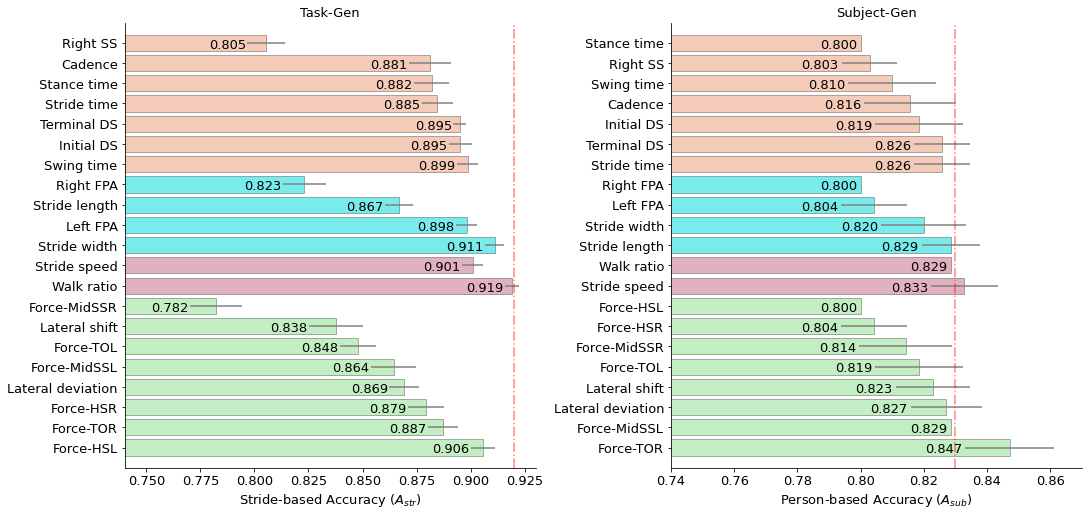

In [40]:
#Plotting Task and Subject gen PI side-by-side 
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
font = {'size'   : 13}
mpl.rc('font', **font)


fig, axes = plt.subplots(1, 2, sharex=False, sharey = False, figsize=(15, 7), constrained_layout=True)
# fig.tight_layout()
# sns.despine(offset=0)

#Bar plot for the Task-Gen
sns.barplot(x = task_gen_metric, y = task_gen_pi_df.index, palette= task_gen_pi_df['colors'], linewidth = 0.5, \
                 edgecolor = 'k', ax = axes[0], xerr = task_gen_pi_df['std']*1, \
            ecolor = 'grey', capstyle='projecting', data=task_gen_pi_df, alpha = 0.6)
#palette= colors_sorted, #use for colored plot

#Sorting the feature display names by the order of appearance on the plot
feature_display_names_sorted = [feature_dic[x] for x in task_gen_pi_df.index]

#Adding the metric of interest as text to the plot
for idx, p in enumerate(axes[0].patches):
    axes[0].annotate("%.3f" % p.get_width(), \
                     (p.get_x() + p.get_width()- task_gen_pi_df['std'][idx]-0.004, p.get_y()-0.35),
                xytext=(7, 10), textcoords='offset points', ha = 'right', fontsize = 13)
fig.texts.append(axes[0].texts.pop())    
    
axes[0].set_yticks(np.arange(21))
axes[0].set_yticklabels(feature_display_names_sorted, fontsize = 13)
axes[0].set_ylim(-1,21)
axes[0].set_xlim(0.74, 0.93)
axes[0].set_xlabel(task_gen_metric_display_name, fontsize = 13)
axes[0].set_title('Task-Gen', fontsize = 13)

#Bar plot for the subject gen 
sns.barplot(x = subject_gen_metric, y = subject_gen_pi_df.index, data=subject_gen_pi_df, palette= subject_gen_pi_df['colors'], linewidth = 0.5, \
                 edgecolor = 'k', ax = axes[1], xerr = subject_gen_pi_df['std']*1, ecolor = 'grey', capstyle='projecting'\
           , alpha = 0.6)
feature_display_names_sorted2 = [feature_dic[x] for x in subject_gen_pi_df.index]

for idx, p in enumerate(axes[1].patches):
    axes[1].annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width()- subject_gen_pi_df['std'][idx]-0.015, p.get_y()-0.35),
                xytext=(7, 10), textcoords='offset points', fontsize = 13)
fig.texts.append(axes[1].texts.pop())  

#Adding a line showing the best Task-Gen metric in best regress-N model
axes[0].axvline(x=0.92, color = 'r', alpha = 0.5, linestyle = '-.')
#Adding a line showing the best Subject-Gen metric in the best regress-N model 
axes[1].axvline(x=0.83, color = 'r', alpha = 0.5, linestyle = '-.')

axes[1].set_yticks(np.arange(21))
axes[1].set_yticklabels(feature_display_names_sorted2, fontsize = 13)
axes[1].set_ylim(-1,21)
axes[1].set_xlim(0.74, 0.87)
axes[1].set_xlabel(subject_gen_metric_display_name, fontsize = 13)
axes[1].set_title('Subject-Gen', fontsize = 13)

# plt.title('Feature permutation importance')
# plt.savefig('side_by_side.png', dpi = 250, bbox_inches='tight')
plt.savefig('D:\\gait\\results\\feature_importance\\plots\\PI_side_by_side.png', dpi = 250, bbox_inches='tight')
plt.show()

## Version 2a. for Permutation Importance Plot - Only Task gen horizontal plot

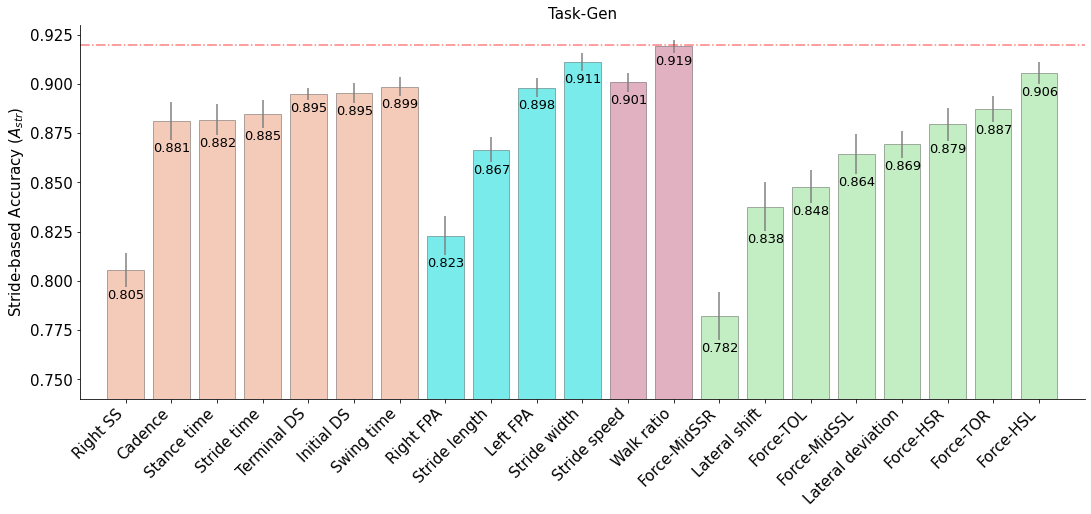

In [861]:
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
font = {'size'   : 15}

mpl.rc('font', **font)

#Reverse for the horizontal bar plot
task_gen_pi_df=task_gen_pi_df.iloc[::-1]

fig, axes = plt.subplots(1, 1, sharex=False, sharey = False, figsize=(15, 7), constrained_layout=True)
# fig.tight_layout()
# sns.despine(offset=0)
sns.barplot(x = task_gen_pi_df.index, y = task_gen_metric, palette= task_gen_pi_df['colors'], linewidth = 0.5, \
                 edgecolor = 'k', ax = axes, yerr = task_gen_pi_df['std']*1, capsize=0.2, \
            ecolor = 'grey', capstyle='projecting', data=task_gen_pi_df, alpha = 0.6, orient= 'v')
#palette= colors_sorted, #use for colored plot
feature_display_names_sorted = [feature_dic[x] for x in task_gen_pi_df.index]
for idx, p in enumerate(axes.patches):
    axes.annotate("%.3f" % p.get_height(), \
                     (p.get_x()+0.30, p.get_y() + p.get_height()- task_gen_pi_df['std'][idx]-0.01),
                xytext=(5, 8), textcoords='offset points', ha = 'center', fontsize = 13)
fig.texts.append(axes.texts.pop())    
    
axes.set_xticks(np.arange(21))
axes.set_xticklabels(feature_display_names_sorted, fontsize = 15, rotation = 45, ha = 'right')
axes.set_xlim(-1,21)
axes.set_ylim(0.74, 0.93)
axes.set_ylabel(task_gen_metric_display_name, fontsize = 15)
axes.set_title('Task-Gen', fontsize = 15)

#Line to show the best Task-gen metric 
axes.axhline(y=0.92, color = 'r', alpha = 0.5, linestyle = '-.')

# plt.title('Task-gen Feature PI')
# plt.savefig('PI_taskgen.png', dpi = 250, bbox_inches='tight')
plt.savefig('D:\\gait\\results\\feature_importance\\plots\\PI_taskgen.png', dpi = 250, bbox_inches='tight')
plt.show()

## Version 2b. for Permutation Importance Plot - Only Subject gen horizontal plot

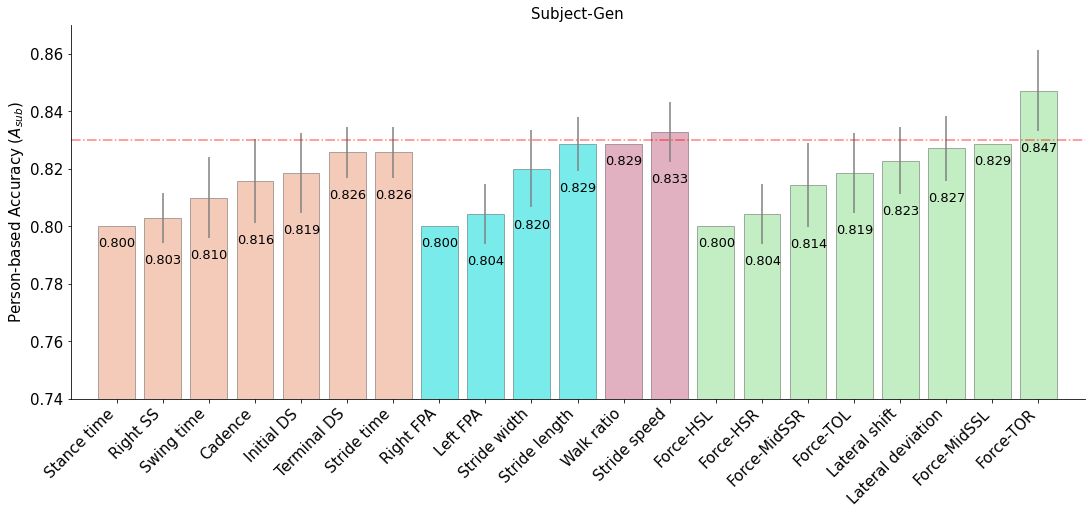

In [862]:
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
font = {'size'   : 15}

mpl.rc('font', **font)

#Reverse for the horizontal bar plot
subject_gen_pi_df=subject_gen_pi_df.iloc[::-1]

fig, axes = plt.subplots(1, 1, sharex=False, sharey = False, figsize=(15, 7), constrained_layout=True)
# fig.tight_layout()
# sns.despine(offset=0)
sns.barplot(x = subject_gen_pi_df.index, y = subject_gen_metric, palette= colors, linewidth = 0.5, \
                 edgecolor = 'k', ax = axes, yerr = subject_gen_pi_df['std']*1, capsize=0.2, \
            ecolor = 'grey', capstyle='projecting', data=subject_gen_pi_df, alpha = 0.6, orient= 'v')
#palette= colors_sorted, #use for colored plot
feature_display_names_sorted = [feature_dic[x] for x in subject_gen_pi_df.index]
for idx, p in enumerate(axes.patches):
    axes.annotate("%.3f" % p.get_height(), \
                     (p.get_x()+0.30, p.get_y() + p.get_height()- subject_gen_pi_df['std'][idx]-0.01),
                xytext=(5, 8), textcoords='offset points', ha = 'center', fontsize = 13)
fig.texts.append(axes.texts.pop())    
    
axes.set_xticks(np.arange(21))
axes.set_xticklabels(feature_display_names_sorted, fontsize = 15, rotation = 45, ha = 'right')
axes.set_xlim(-1,21)
axes.set_ylim(0.74, 0.87)
axes.set_ylabel(subject_gen_metric_display_name, fontsize = 15)
axes.set_title('Subject-Gen', fontsize = 15)

#Line to show the best Subject-Gen metric
axes.axhline(y=0.83, color = 'r', alpha = 0.5, linestyle = '-.')

# plt.savefig('PI_subjectgen.png', dpi = 250, bbox_inches='tight')
plt.savefig('D:\\gait\\results\\feature_importance\\plots\\PI_subjectgen.png', dpi = 250, bbox_inches='tight')


## Version 3 of Permutation Importance plot - Both task and subject gen together on horizontal bar plot

In [12]:

#Reverse for the horizontal bar plot
task_gen_pi_df=task_gen_pi_df.iloc[::-1]

#Reverse for the horizontal bar plot
subject_gen_pi_df=subject_gen_pi_df.iloc[::-1]

task_gen_pi_df['hue'] = 'task'
task_gen_pi_df.rename(columns={task_gen_metric:'metric'}, inplace=True)

subject_gen_pi_df['hue'] = 'subject'
subject_gen_pi_df.rename(columns={subject_gen_metric:'metric'}, inplace=True)

#Since both task and subject gen plots are on the same plot, we would need to compromise and 
#keep the subject gen index order same as task-gen index order 
subject_gen_pi_df = subject_gen_pi_df.reindex(task_gen_pi_df.index)

task_subject_pi_concat = pd.concat((task_gen_pi_df, subject_gen_pi_df))

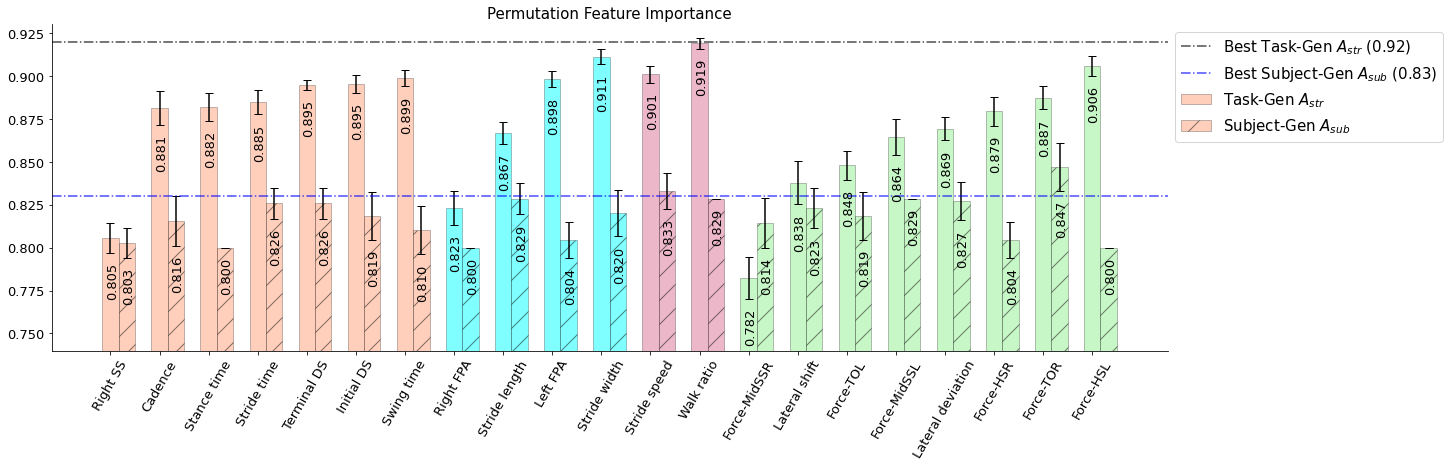

In [43]:
fig, axes = plt.subplots(1, 1, sharex=False, sharey = False, figsize=(20, 6))
sns.despine(offset=0)
font = {'size'   : 15}
mpl.rc('font', **font)

names = [r'$ST$', r'$S_tT$', r'$S_wT$', r'$SS_R$', r'$DS_T$',
       r'$DS_I$',  r'$C$', r'$SL$', r'$SW$', r'$\theta_L$', r'$\theta_R$', r'$SS$',
       r'$W$', r'$F_{HSR}$', r'$F_{TOL}$', r'$F_{MidSSR}$', r'$F_{HSL}$',
       r'$F_{TOR}$', r'$F_{MidSSL}$', r'$\beta_L$', r'$\alpha_L$']

#First bar plot for the Task-Gen
plt.bar(height = task_gen_pi_df['metric'], x = 3*np.array(range(len(task_gen_pi_df.index)))-3, data = task_gen_pi_df, linewidth = 0.5, \
                 edgecolor = 'k', alpha = 0.5, \
           yerr = task_gen_pi_df['std'], capsize = 4, label = 'Task-Gen', width = 1)
#Second bar plot for the Subject-Gen
plt.bar(height = subject_gen_pi_df['metric'], x = 3*np.array(range(len(task_gen_pi_df.index)))-2, data = subject_gen_pi_df, linewidth = 0.5, \
                 edgecolor = 'k', alpha = 0.5, \
           yerr = subject_gen_pi_df['std'], capsize = 4, width = 1, label = 'Subject-Gen')

#Assigning the grouped color and hatch for separating between task and subject gen results 
for i, bar in enumerate(axes.patches):
    bar.set_facecolor(task_subject_pi_concat['colors'][i])
    bar.set_edgecolor = 'k'
    if task_subject_pi_concat['hue'][i]=='subject':
        bar.set_hatch('/')

#Writing in text the metrics for both task and subject gen bars 
for idx, p in enumerate(axes.patches):
    axes.annotate("%.3f" % p.get_height(), \
                     (p.get_x()+0.30, p.get_y() + p.get_height()- task_subject_pi_concat['std'][idx]-0.03),
                xytext=(5, 8), textcoords='offset points', ha = 'center', fontsize = 13, rotation = 90)
fig.texts.append(axes.texts.pop())   

#Adding a line for the best Task-Gen metric 
axes.axhline(y=0.92, color = 'k', alpha = 0.7, linestyle = '-.', label = 'Best Task-Gen (0.92)')
# axes.text(-2, 0.925,'Best Task-Gen '+ r'$A_{str}$',rotation=0)

#Adding a line for the best Subject-Gen metric 
axes.axhline(y=0.83, color = 'b', alpha = 0.7, linestyle = '-.', label = 'Best Subject-Gen (0.83)')
# axes.text(-2, 0.835,'Best Subject-Gen ' + r'$A_{sub}$',rotation=0)

#Feature display names - Note that these should be same ordering for task and subject PI 
#for this case since both are plotted on same plot
feature_display_names_sorted = [feature_dic[x] for x in subject_gen_pi_df.index]

handles, _ = axes.get_legend_handles_labels()
plt.xticks(3*np.arange(21)-3, feature_display_names_sorted, fontsize = 13, rotation = 60)
#Keeping the legend outside the main plot 
axes.legend(handles, ['Best Task-Gen '+ r'$A_{str}$ (0.92)', 'Best Subject-Gen ' + r'$A_{sub}$ (0.83)', 'Task-Gen '+ r'$A_{str}$', 'Subject-Gen ' + r'$A_{sub}$'], \
            loc = 'best', bbox_to_anchor=(1, 1), fontsize = 15)
axes.axhline(linewidth=1, color='k')
# axes.set_xticklabels(f)
axes.set_title('Permutation Feature Importance', fontsize = 15)
axes.set_xlabel('')
#Note y limit should be chosen based on range of metrics we are showing 
axes.set_ylim((0.74, 0.93))
axes.set_ylabel('')

plt.savefig('D:\\gait\\results\\feature_importance\\plots\\PI_task_subjectgen_stride_acc_horizontal.png', dpi = 250, bbox_inches='tight')
plt.show()

## Version 4: Both task and subject gen together on horizontal plot, but showing % loss rather than raw metrics 

In [11]:
task_gen_pi_df

,metric,std,colors,color_order,hue
SS_R,0.805429,0.008641,lightsalmon,1,task
cadence,0.881357,0.009716,lightsalmon,1,task
swing_time,0.881929,0.008058,lightsalmon,1,task
stride_time,0.884643,0.007103,lightsalmon,1,task
DS_L,0.894929,0.002875,lightsalmon,1,task
DS_R,0.895286,0.005163,lightsalmon,1,task
stance_time,0.898643,0.004783,lightsalmon,1,task
RightFPA,0.823000,0.009875,cyan,2,task
stride_length,0.866714,0.006457,cyan,2,task
LeftFPA,0.898214,0.004880,cyan,2,task


In [13]:
task_gen_pi_df['normalized_metric'] = task_gen_pi_df['metric']/0.92
task_gen_pi_df['normalized_std'] = task_gen_pi_df['std']/0.92

subject_gen_pi_df['normalized_metric'] = subject_gen_pi_df['metric']/0.77
subject_gen_pi_df['normalized_std'] = subject_gen_pi_df['std']/0.77

task_gen_pi_df['normalized_metric_reverse'] = 1-task_gen_pi_df['normalized_metric']
subject_gen_pi_df['normalized_metric']

task_subject_pi_concat = pd.concat((task_gen_pi_df, subject_gen_pi_df))

In [14]:
task_subject_pi_concat

,metric,std,colors,color_order,hue,normalized_metric,normalized_std,normalized_metric_reverse
SS_R,0.805429,0.008641,lightsalmon,1,task,0.875466,0.009393,0.124534
cadence,0.881357,0.009716,lightsalmon,1,task,0.957997,0.010561,0.042003
swing_time,0.881929,0.008058,lightsalmon,1,task,0.958618,0.008759,0.041382
stride_time,0.884643,0.007103,lightsalmon,1,task,0.961568,0.007721,0.038432
DS_L,0.894929,0.002875,lightsalmon,1,task,0.972748,0.003125,0.027252
DS_R,0.895286,0.005163,lightsalmon,1,task,0.973137,0.005612,0.026863
stance_time,0.898643,0.004783,lightsalmon,1,task,0.976786,0.005198,0.023214
RightFPA,0.823000,0.009875,cyan,2,task,0.894565,0.010733,0.105435
stride_length,0.866714,0.006457,cyan,2,task,0.942081,0.007019,0.057919
LeftFPA,0.898214,0.004880,cyan,2,task,0.976320,0.005305,0.023680


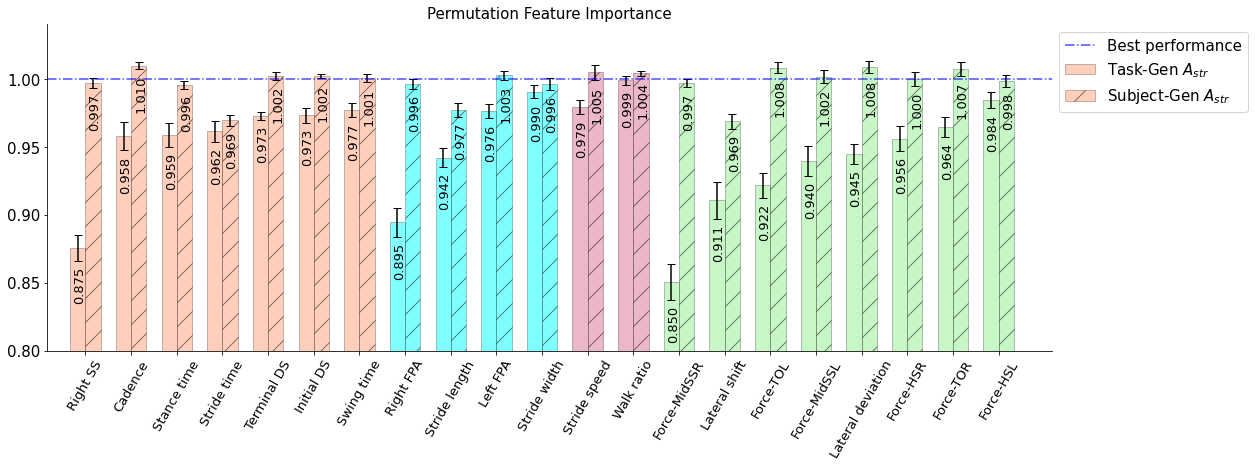

In [16]:
fig, axes = plt.subplots(1, 1, sharex=False, sharey = False, figsize=(18, 6))
sns.despine(offset=0)
font = {'size'   : 15}
mpl.rc('font', **font)

names = [r'$ST$', r'$S_tT$', r'$S_wT$', r'$SS_R$', r'$DS_T$',
       r'$DS_I$',  r'$C$', r'$SL$', r'$SW$', r'$\theta_L$', r'$\theta_R$', r'$SS$',
       r'$W$', r'$F_{HSR}$', r'$F_{TOL}$', r'$F_{MidSSR}$', r'$F_{HSL}$',
       r'$F_{TOR}$', r'$F_{MidSSL}$', r'$\beta_L$', r'$\alpha_L$']

#First bar plot for the Task-Gen
plt.bar(height = task_gen_pi_df['normalized_metric'], x = 3*np.array(range(len(task_gen_pi_df.index)))-3, data = task_gen_pi_df, linewidth = 0.5, \
                 edgecolor = 'k', alpha = 0.5, \
           yerr = task_gen_pi_df['normalized_std'], capsize = 4, label = 'Task-Gen', width = 1)
#Second bar plot for the Subject-Gen
plt.bar(height = subject_gen_pi_df['normalized_metric'], x = 3*np.array(range(len(task_gen_pi_df.index)))-2, data = subject_gen_pi_df, linewidth = 0.5, \
                 edgecolor = 'k', alpha = 0.5, \
           yerr = subject_gen_pi_df['normalized_std'], capsize = 4, width = 1, label = 'Subject-Gen')

#Assigning the grouped color and hatch for separating between task and subject gen results 
for i, bar in enumerate(axes.patches):
    bar.set_facecolor(task_subject_pi_concat['colors'][i])
    bar.set_edgecolor = 'k'
    if task_subject_pi_concat['hue'][i]=='subject':
        bar.set_hatch('/')

#Writing in text the metrics for both task and subject gen bars 
for idx, p in enumerate(axes.patches):
    axes.annotate("%.3f" % p.get_height(), \
                     (p.get_x()+0.30, p.get_y() + p.get_height()- task_subject_pi_concat['normalized_std'][idx]-0.035),
                xytext=(5, 8), textcoords='offset points', ha = 'center', fontsize = 13, rotation = 90)
fig.texts.append(axes.texts.pop())   

#Adding a line for the best Task-Gen metric 
axes.axhline(y=1.0, color = 'b', alpha = 0.7, linestyle = '-.', label = r'Best Task/Subject-Gen $A_{str}$ (0.92)')
# axes.text(-2, 0.925,'Best Task-Gen '+ r'$A_{str}$',rotation=0)

#Adding a line for the best Subject-Gen metric 
# axes.axhline(y=1.0, color = 'b', alpha = 0.7, linestyle = '-.', label = 'Best Subject-Gen (0.83)')
# # axes.text(-2, 0.835,'Best Subject-Gen ' + r'$A_{sub}$',rotation=0)

#Feature display names - Note that these should be same ordering for task and subject PI 
#for this case since both are plotted on same plot
feature_display_names_sorted = [feature_dic[x] for x in subject_gen_pi_df.index]

handles, _ = axes.get_legend_handles_labels()
plt.xlim((-5, 21*3-2))
plt.xticks(3*np.arange(21)-2.5, feature_display_names_sorted, fontsize = 13, rotation = 60)
#Keeping the legend outside the main plot 
axes.legend(handles, ['Best performance', 'Task-Gen '+ r'$A_{str}$', 'Subject-Gen ' + r'$A_{str}$'], \
            loc = 'best', bbox_to_anchor=(1, 1), fontsize = 15)
axes.axhline(linewidth=1, color='k')
# axes.set_xticklabels(f)
axes.set_title('Permutation Feature Importance', fontsize = 15)
axes.set_xlabel('')
#Note y limit should be chosen based on range of metrics we are showing 
axes.set_ylim((0.80, 1.04))
axes.set_ylabel('')

plt.savefig('D:\\gait\\results\\feature_importance\\plots\\PI_task_subjectgen_normalized_stride_acc_horizontal.png', dpi = 250, bbox_inches='tight')
plt.show()